<center><img src="https://www.insight.com/content/dam/insight-web/logos/global-nav.svg" width='400'></center>
<br>
<font color='#544640'>
<center><i>Mastery 2019</i></center>
<center><i>Scottsdale, Arizona</i></center></font>
<center><i><font color='#544640' size='1'>Author: Victor Aranda</font></i></center></font>
<center><i><font color='#B81590' size='1'>victor.aranda@insight.com</font></i></center></font>
<hr>

# <font color="#D21087">Regression</font>

<font color='#544640'>

> In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.<br>
> <br>Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.<br>
> <br>Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

https://en.wikipedia.org/wiki/Linear_regression

Often times ***linear regression***, despite its weaknesses, is the best fit to a problem. Although a powerful, trained neural network or an ensemble solution may provide better accuracy, it could take months or years to build. Linear regression often produces a 'good enough' result with minimal effort.</font>

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

In [0]:
# environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import operator

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import scipy.linalg
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

## <font color="#D21087">Two Dimensions</font>

<font color='#544640'>Can you imagine the line that predicts (or follows) the arrangement of these data points?</font>

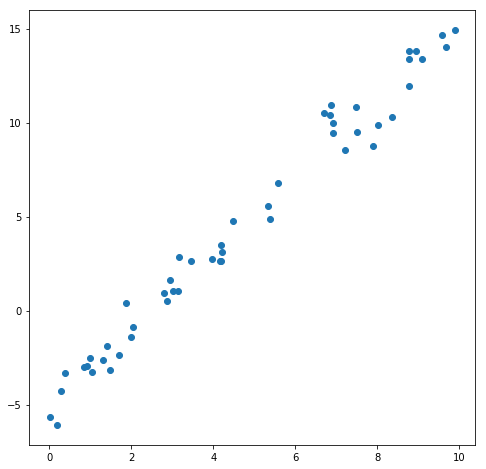

In [2]:
%matplotlib inline

rng = np.random.RandomState(1)
x1 = 10 * rng.rand(50)
y1 = 2 * x1 - 5 + rng.randn(50)

plt.subplots(1, 1, figsize=(8, 8))

plt.scatter(x1, y1)

plt.show()

### <font color="#D21087">Two Points</font>

<font color='#544640'>The simplest possible case of ***linear regression*** is a set of only two points, in two dimensions. In this case, our model is simply a Least-Squares solution to an $A x = b$ linear system; the equation of a line.</font>

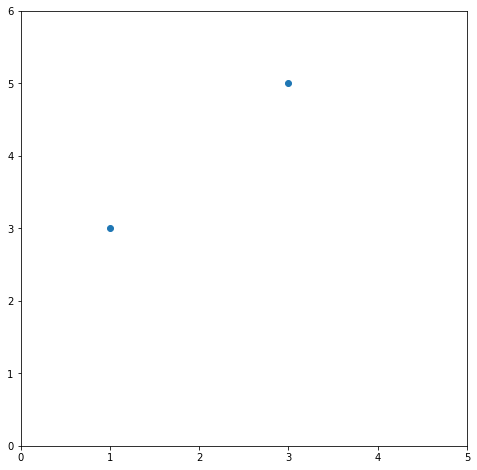

In [3]:
%matplotlib inline

x2 = np.array([1, 3])
y2 = np.array([3, 5])

plt.subplots(1, 1, figsize=(8, 8))
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.plot(x2, y2, "o")

plt.show()

Given the two (*known*) points: $(x_1, y_1) = (1,3) $ and $(x_2, y_2) = (3,5) $, we must solve the equations:

$c_0 + c_1 x_1 = y_1$  
$c_0 + c_1 x_2 = y_2$  

$\displaystyle{
\left(\begin{matrix} 1 & x_1\\ 1 & x_2\end{matrix}\right)\left(\begin{matrix}c_0 \\ c_1\end{matrix}\right) = 
\left(\begin{matrix} y_1 \\ y_2\end{matrix}\right)
}$

for $c_0$ and $c_1$.



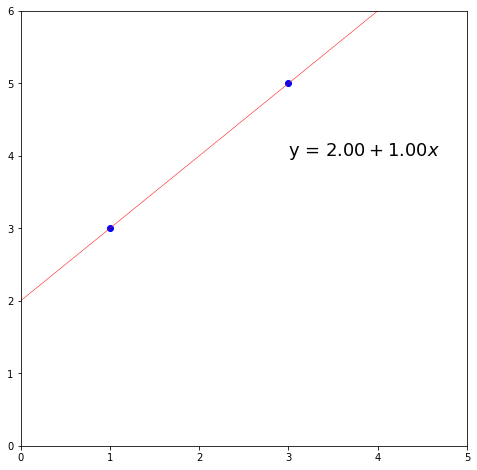

In [4]:
D = np.array([[1, 1], x2.T])

# it's like cheating!
c0, c1 = np.linalg.solve(D, y2)

plt.subplots(1, 1, figsize=(8, 8))
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.plot(x2, y2, 'ob')

xw = np.linspace(0, 5, 6)

plt.plot(xw, c0 + c1 * xw, '-r', lw=.5)
plt.text(3, 4, r'y = ${:.2f} + {:.2f}x$'.format(c0, c1), fontsize=18)
plt.show()

### <font color="#D21087">Three Points</font>

<font color='#544640'>Once a third point is added, the line may no longer pass through the points. It will still find the 'best fit', and we're still solving a system of linear equations. We can still define the best linear solution as the one which exhibits the least 'error' or which minimizes 'residuals'. There are several ways to calculate these fits.</font>

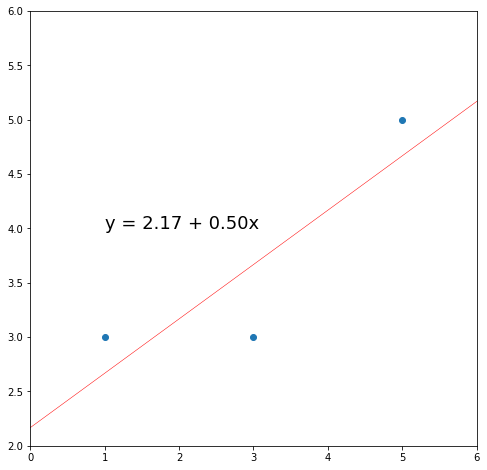

In [5]:
data3 = np.array([[1, 3], [3, 5], [5, 5]])

x3 = np.array([1, 3, 5])
y3 = np.array([3, 3, 5])

plt.subplots(1, 1, figsize=(8, 8))
plt.xlim(0, 6)
plt.ylim(2, 6)
plt.plot(x3, y3, 'o')

c1, c0 = np.polyfit(x3, y3, 1)

plt.text(1, 4, 'y = {:.2f} + {:.2f}x'.format(c0, c1), fontsize=18)

xw = np.linspace(0, 10, 11)
plt.plot(xw, c0 + c1 * xw, '-r', lw=.5)

plt.show()

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

### <font color="#D21087">Polynomial Regression</font>

<font color='#544640'>What happens when the data isn't linear? How do we fit? Here we will create a data set based on the equation:

$$ \Large y = \frac{1}{2}x^3 -2x^2 + x$$

We will also add some noise to the data to make it look a little bit more realistic.
</font>

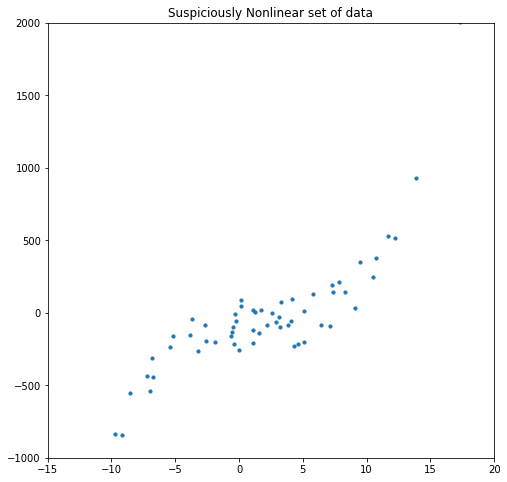

In [6]:
# adapted from
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

np.random.seed(0)

n_points = 60

x4 = np.sort(2 - 3 * np.random.normal(0, 2, n_points))
y4 = x4 - 2 * (x4**2) + 0.5 * (x4**3) + np.random.normal(-100, 100, n_points)

plt.figure(figsize=(8, 8))
plt.xlim(-15, 20)
plt.ylim(-1000, 2000)
plt.title('Suspiciously Nonlinear set of data')

plt.scatter(x4, y4, s=10)

plt.show()

### <font color="#D21087">Fit a Linear Model</font>

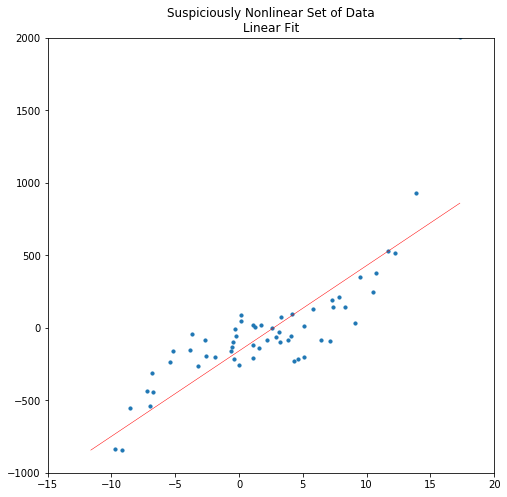

In [7]:
x5 = x4[:, np.newaxis]
y5 = y4[:, np.newaxis]

model = LinearRegression()
model.fit(x5, y5)
y_linear_pred = model.predict(x5)

plt.figure(figsize=(8, 8))

plt.xlim(-15, 20)
plt.ylim(-1000, 2000)
plt.title('Suspiciously Nonlinear Set of Data\nLinear Fit')

plt.scatter(x5, y5, s=10)
plt.plot(x5, y_linear_pred, '-r', lw=.5)
plt.show()

<font color='#544640'>
Does the linear model do a 'good enough' job? Are the points in the data set adequately described by the line? What is the rationale behind your answer?<br><br>

<center><img src='https://github.com/kbreit/mastery19/blob/master/intro_to_ai/img/over_line.gif?raw=1' width=500></center><br><br>

Damnit, Walter, now we need to fit a 3rd-order polynomial ($x^3$) for this set of points, man.</font><br><br>

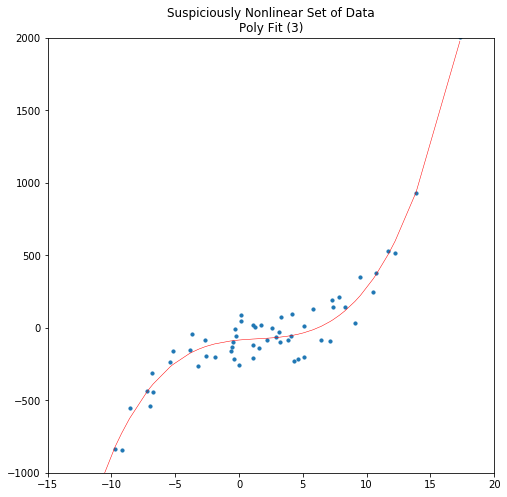

In [8]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x5)
model = LinearRegression()
model.fit(x_poly, y5)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y5, y_poly_pred))
r2 = r2_score(y5, y_poly_pred)


# plot
plt.figure(figsize=(8, 8))
plt.xlim(-15, 20)
plt.ylim(-1000, 2000)
plt.title('Suspiciously Nonlinear Set of Data\nPoly Fit (3)')

plt.scatter(x5, y5, s=10)

# # sort the values of x before line plot
# sort_axis = operator.itemgetter(0)

#sorted_zip_poly = zip(x5, y_poly_pred)
#x5, y_poly_pred = zip(*sorted_zip_poly)

plt.plot(x5, y_poly_pred, '-r', lw=.5)

plt.show()

<font color='#544640'>Our polynomial ($x^3$) model fits the data much more closely. We will now take a look at the residuals for the two models to compare their accuracy - specifically how that accuracy varies along $x$, which is a key consideration.</font>

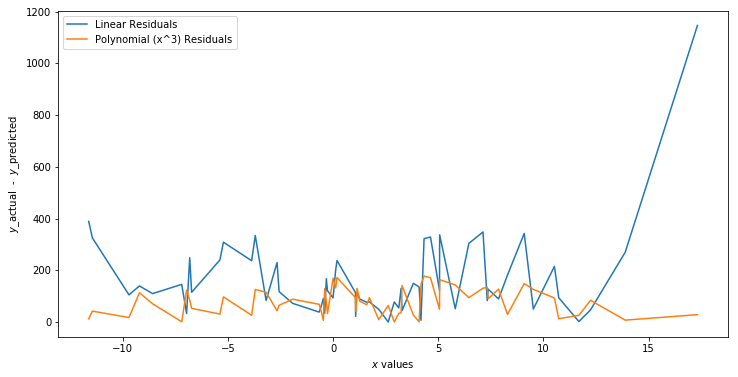

In [9]:
# calculate total residuals for both models

resid_linear = np.abs(y5 - y_linear_pred)
resid_poly = np.abs(y5 - y_poly_pred)

# plot the residuals over x for both models
plt.figure(figsize=(12, 6))
plt.plot(x5, resid_linear, label='Linear Residuals')
plt.plot(x5, resid_poly, label='Polynomial (x^3) Residuals')

plt.legend()
plt.xlabel('$x$ values')
plt.ylabel('$y$_actual  -  $y$_predicted')
plt.show()

In [10]:
print('Total residual for linear fit:',round(np.sum(resid_linear),2))
print('Total residual for polynomial fit:',round(np.sum(resid_poly),2))

Total residual for linear fit: 9904.46
Total residual for polynomial fit: 4766.09


<font color='#544640'>Which is 'better'? What is the rationale for your answer?</font><br><br>

<center><img src='https://github.com/kbreit/mastery19/blob/master/intro_to_ai/img/will_not_stand.gif?raw=1' width=500></center><br><br>

### <font color="#D21087">Overfitting</font>

<font color='#544640'>Nonlinear fits can capture the behavior of many natural systems. Careful - the higher the order, the more likely we are to over fit. Depending on the use case, we sometimes want a model that will be generally applicable to new, unseen data from the same population - this comes up in classification. If the model fits too 'tightly', its error versus observed data will be higher than a 'looser' fit.</font>

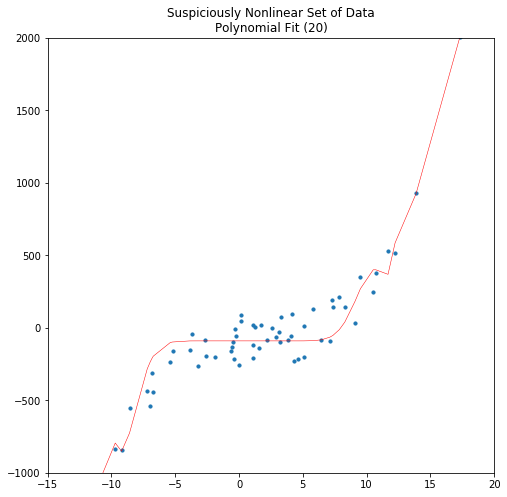

In [11]:
polynomial_features = PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x5)
model = LinearRegression()
model.fit(x_poly, y5)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y5, y_poly_pred))
r2 = r2_score(y5, y_poly_pred)


# plot
plt.figure(figsize=(8, 8))
plt.xlim(-15, 20)
plt.ylim(-1000, 2000)
plt.title('Suspiciously Nonlinear Set of Data\nPolynomial Fit (20)')

plt.scatter(x5, y5, s=10)

# # sort the values of x before line plot
# sort_axis = operator.itemgetter(0)

#sorted_zip_poly = zip(x5, y_poly_pred)
#x5, y_poly_pred = zip(*sorted_zip_poly)

plt.plot(x5, y_poly_pred, '-r', lw=.5)

plt.show()

### <font color="#D21087">Anscombe's Quartet</font>

<font color='#544640'>

> Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

https://en.wikipedia.org/wiki/Anscombe%27s_quartet
<center><img src='https://github.com/kbreit/mastery19/blob/master/intro_to_ai/img/anscombe_quartet.png?raw=1'></center><br><br><br><br>

For all four datasets share the exact same summary statistics. On the surface, they're indistinguishable!<br>

<table>
    <tr>
        <th>Property</th>
        <th>Value</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>Mean of $x$</td>
        <td>9</td>
        <td>exact</td>
    </tr>
  <tr>
        <td>Sample variance of $x$</td>
        <td>11</td>
        <td>exact</td>
    </tr>
    <tr>
        <td>Mean of $y$</td>
        <td>7.50</td>
        <td>to 2 decimal places</td>
    </tr>
    <tr>
        <td>Sample variance of $y$</td>
        <td>4.125</td>  
        <td>±0.003</td>
    </tr>
    <tr>
        <td>Correlation between $x$ and $y$</td>
        <td>0.816</td>
        <td>to 3 decimal places</td>
    </tr>
    <tr>
        <td>Linear regression line</td>
        <td>$y = 3.00 + 0.500x$</td>
        <td>to 2 and 3 decimal places, respectively</td>
    </tr>
    <tr>
        <td>Coefficient of determination<br>of the linear regression</td>
        <td>0.67</td>
        <td>to 2 decimal places</td>
    </tr>
</table>

</font>

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

## <font color="#D21087">Three Dimensions</font>

<font color='#544640'>Imagine a three-dimensional space filled with data points. These data points may appear to fall into a single plane, or appear as one or more clusters, or follow some other distribution. The same principles we have been discussion apply, althogh the mathematics gets a bit more difficult.

In 2D we fit a ***line*** - in 3D we fit a ***plane***. In data sets of $n$ dimensions (which are difficult to visualize), we fit ***hyperplanes***.

>In geometry, a hyperplane is a subspace whose dimension is one less than that of its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. This notion can be used in any general space in which the concept of the dimension of a subspace is defined. In machine learning, hyperplanes are a key tool to create support vector machines for such tasks as computer vision and natural language processing.

https://en.wikipedia.org/wiki/Hyperplane

</font>

In [0]:
# some helpers

def fit(X, params):
    # 3d Plane Z = aX + bY + c
    return X.dot(params[:2]) + params[2]

def cost_function(params, X, y):
    # L1- norm
    return np.sum(np.abs(y - fit(X, params)))

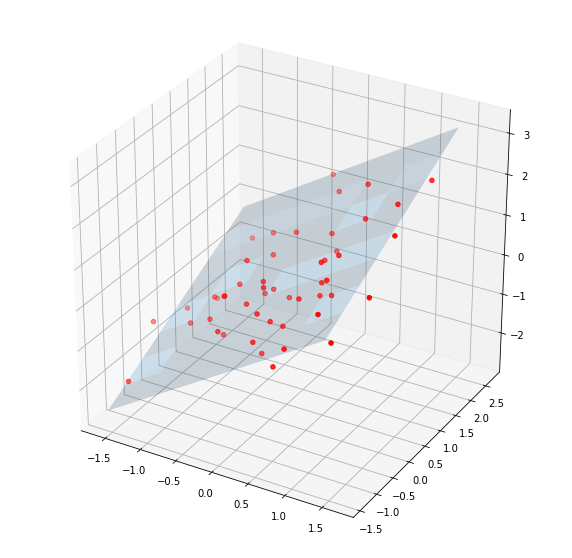

In [18]:
%matplotlib inline

mean = np.array([0.0, 0.0, 0.0])
cov = np.array([[1.0, -0.5, 0.8], [-0.5, 1.1, 0.0], [0.8, 0.0, 1.0]])
data = np.random.multivariate_normal(mean, cov, 50)  # some 3-dim points
mean = np.array([0.0, 0.0, 0.0])

output = minimize(
    cost_function, [0.5, 0.5, 0.5],
    args=(np.c_[data[:, 0], data[:, 1]], data[:, 2]))
y_hat = fit(np.c_[data[:, 0], data[:, 1]], output.x)

X, Y = np.meshgrid(
    np.arange(min(data[:, 0]), max(data[:, 0]), 0.5),
    np.arange(min(data[:, 1]), max(data[:, 1]), 0.5))
XX = X.flatten()
YY = Y.flatten()

Z = output.x[0] * X + output.x[1] * Y + output.x[2]
fig = plt.figure(figsize=(10, 10))

ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r')
plt.show();

<center><img src='https://github.com/kbreit/mastery19/blob/master/intro_to_ai/img/amazing.gif?raw=1' width=500></center>

<center><font color='#544640'>Minds = blown!</font></center>

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>